In [1]:
# Jupyter dirty hack
import os
import sys

PATH = "/home/emaballarin/repositories/celeba_sweeping_cvae/src/"
os.chdir(PATH)
sys.path.append(PATH)

In [2]:
from typing import Tuple
import torch as th
from models import CelebACVAE
from safetensors.torch import load_model
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [3]:
DEVICE_AUTODETECT: bool = True
IMG_SHAPE: Tuple[int, int, int] = (3, 64, 64)
TEST_BS: int = 32
LATENT_SIZE: int = 128
CONDITION_SIZE: int = 14

In [4]:
device = th.device("cuda" if (th.cuda.is_available() and DEVICE_AUTODETECT) else "cpu")

In [5]:
model = CelebACVAE(lat_size=LATENT_SIZE, cond_size=CONDITION_SIZE).to(device)

In [6]:
_ = load_model(model, "./celeba_cvae_v10.safetensors")

In [7]:
_ = model.to(device)
_ = model.eval()

In [8]:
condition = th.zeros(TEST_BS, CONDITION_SIZE).to(device)
condition[:, 0] = 0.5
condition[:, 5] = -2

In [9]:
...

Ellipsis

In [10]:
with th.no_grad():
    img = model.sample_eval(z=None, c=condition.to(device))

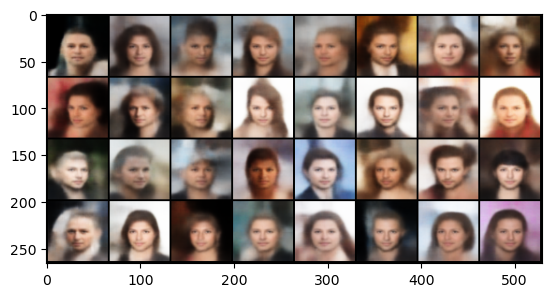

In [11]:
plt.imshow(make_grid(img).permute(1, 2, 0).cpu().detach().numpy())

In [12]:
raise RuntimeError("Stop here")

RuntimeError: Stop here

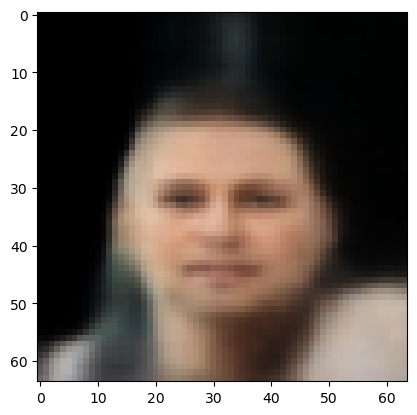

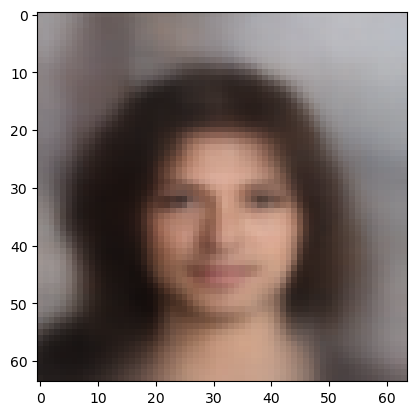

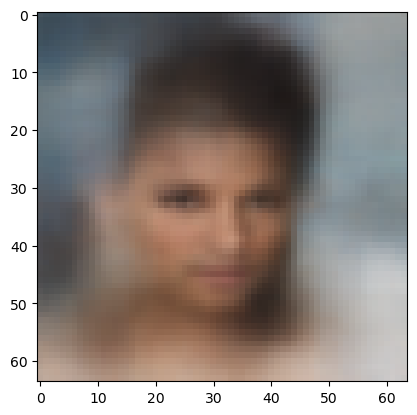

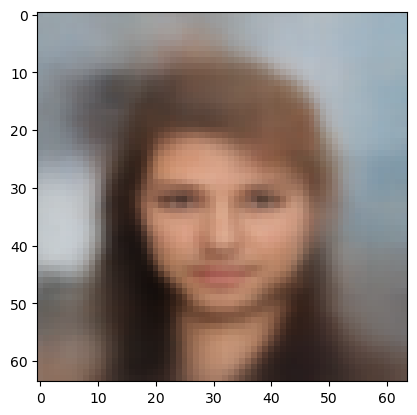

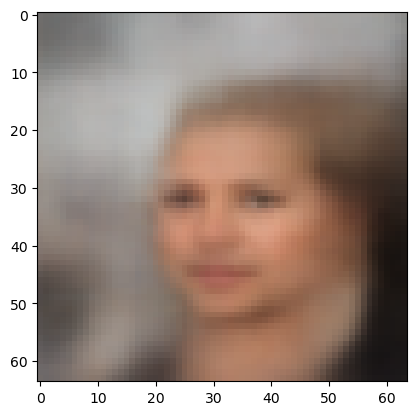

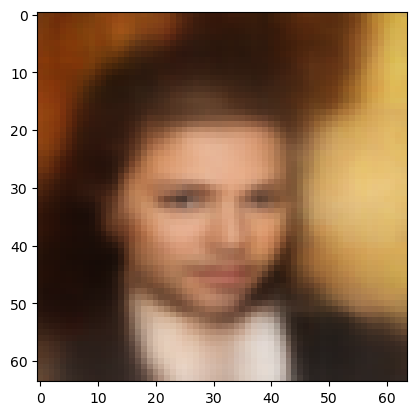

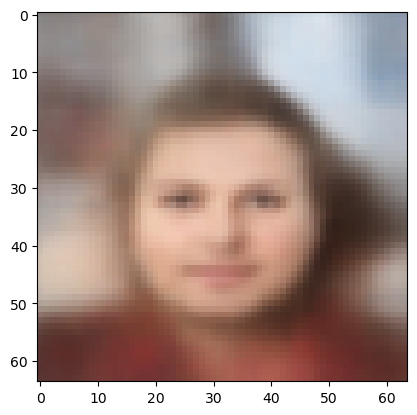

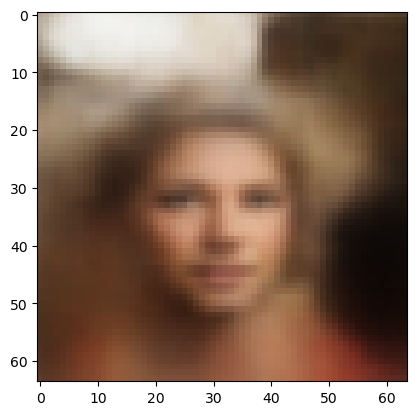

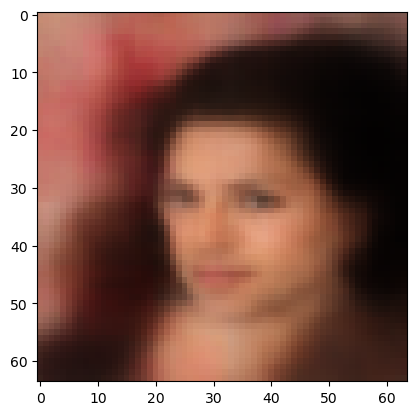

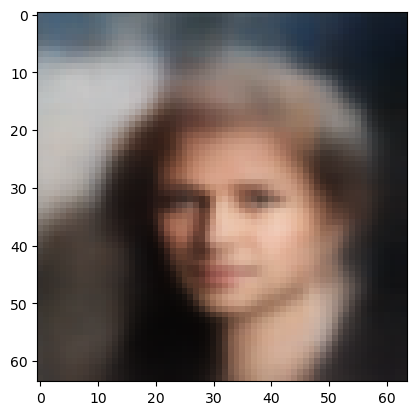

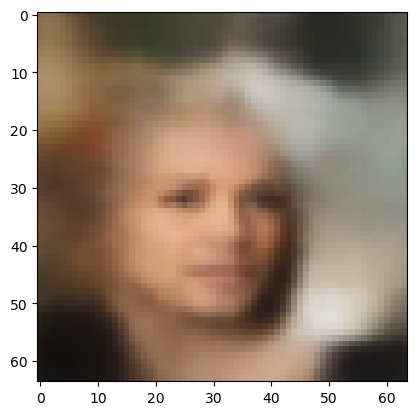

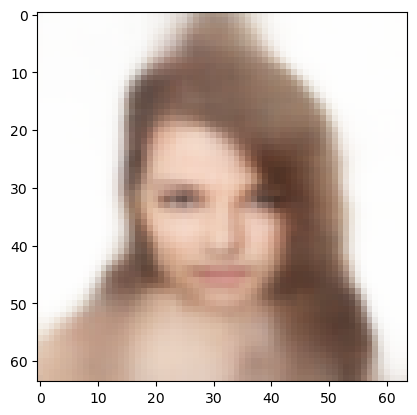

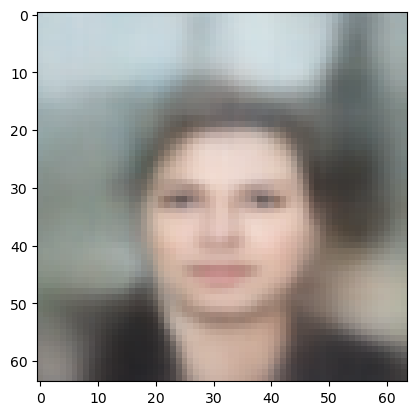

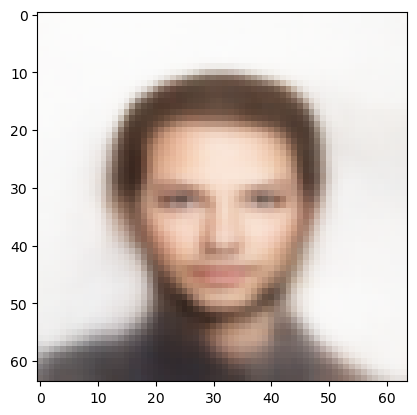

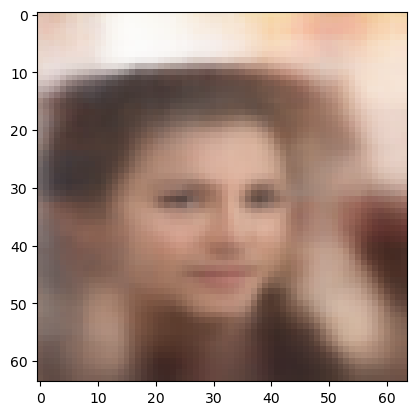

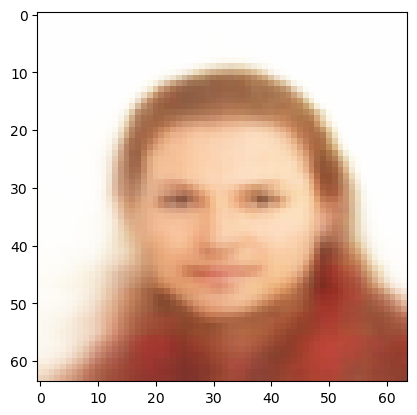

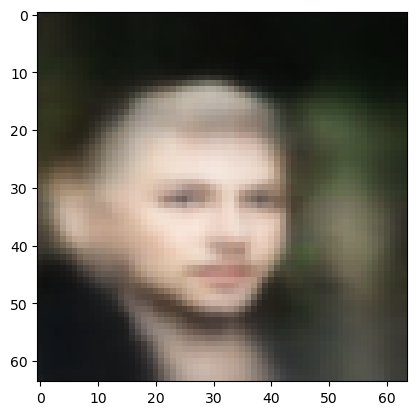

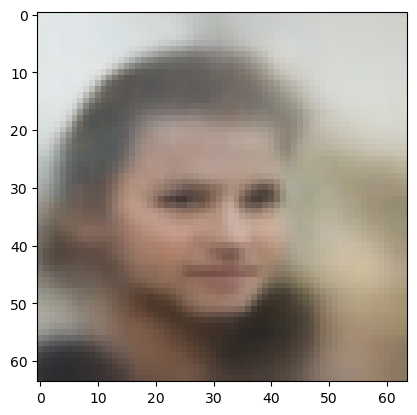

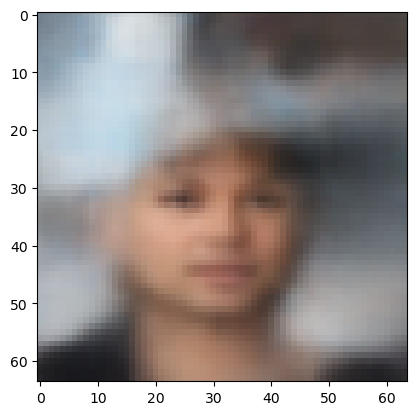

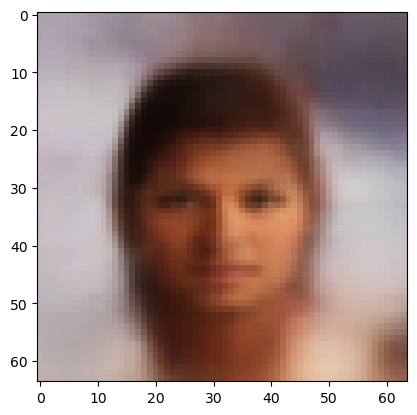

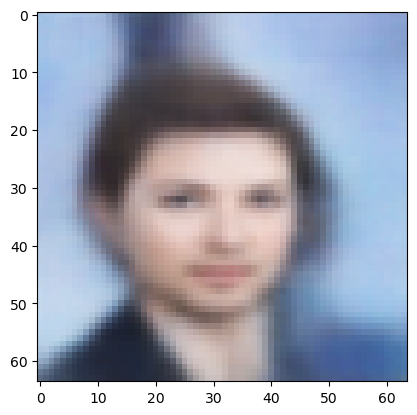

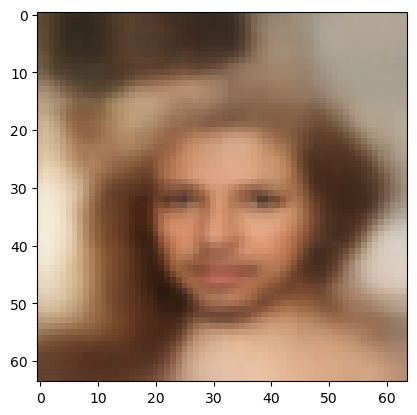

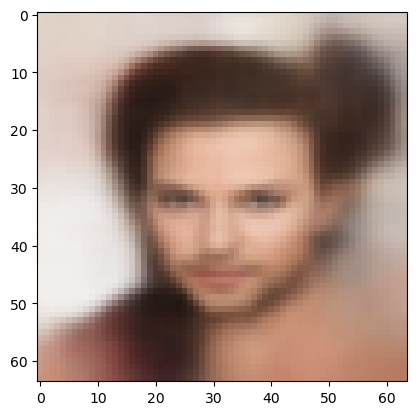

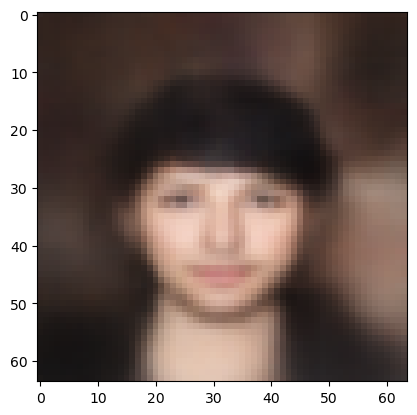

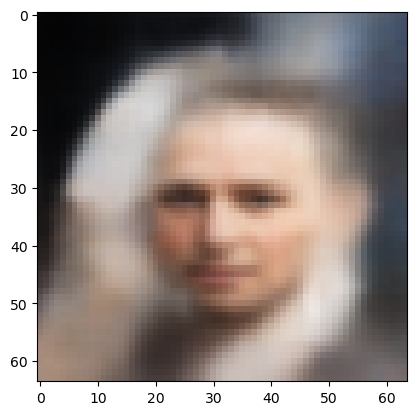

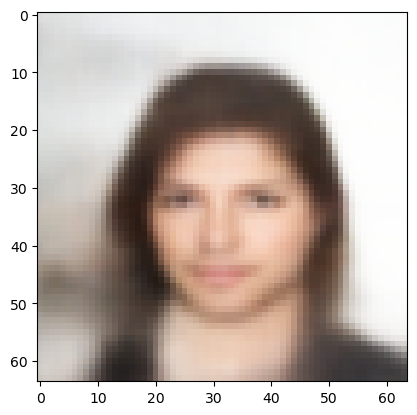

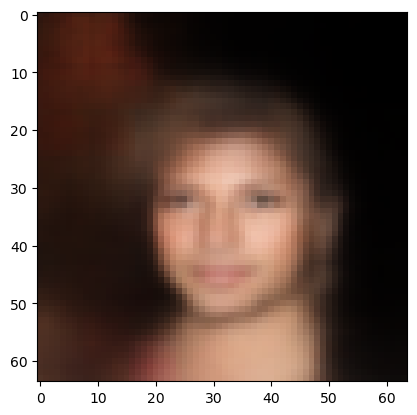

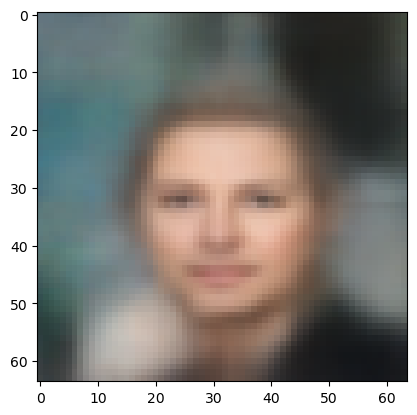

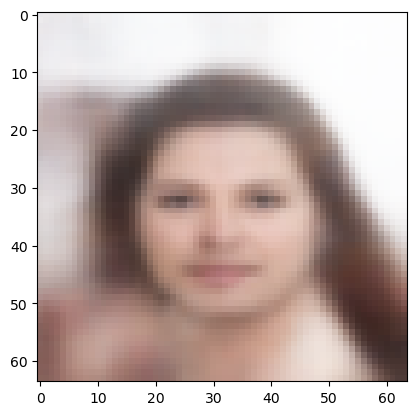

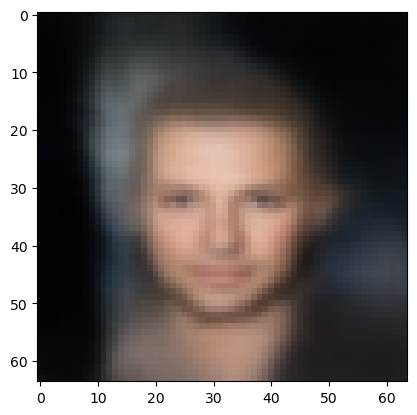

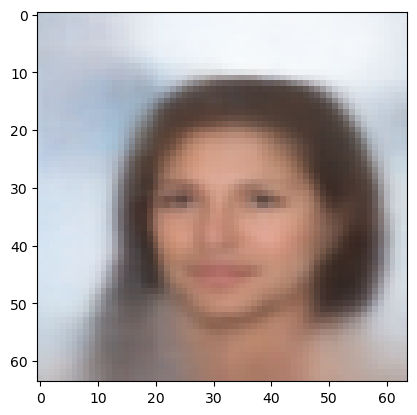

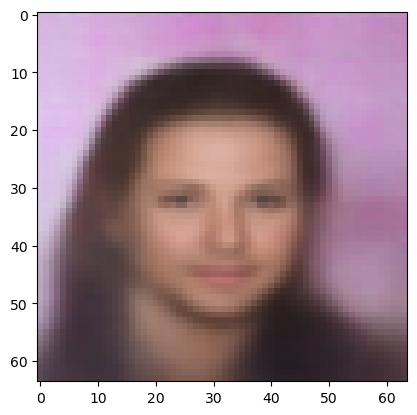

In [13]:
for i in range(32):
    plt.imshow(img[i].permute(1, 2, 0).cpu().detach().numpy())
    plt.show()

In [ ]:
# plt.imshow(make_grid(img).permute(1, 2, 0).cpu().detach().numpy())

In [ ]:
z = th.randn(1, LATENT_SIZE).to(device)
c = th.zeros(1, CONDITION_SIZE).to(device)
condition[:, 0] = 0.5
condition[:, 5] = -2

with th.no_grad():
    img = model.sample_eval(z=z, c=c)
plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())

In [ ]:
myz = z.detach()

In [ ]:
c = th.zeros(1, CONDITION_SIZE).to(device)
for i in range(10):
    c[0, 1] = 4 * i / 20 - 2
    c[0, 2] = 4 * (10 - i) / 10 - 2
    with th.no_grad():
        img = model.sample_eval(z=myz, c=c)
    plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())
    plt.show()

In [14]:
img[0].shape

torch.Size([3, 64, 64])

In [46]:
lap_ker = (
    th.tensor([[0, 1, 0], [1, -4, 1], [0, 1, 0]]).float().expand(3, 3, 3).to(device)
)

In [47]:
lap_ker.shape

torch.Size([3, 3, 3])

In [60]:
lap_var = th.nn.functional.conv2d(
    img[0].unsqueeze(0), lap_ker.unsqueeze(0), padding=1
).var()

In [64]:
lap_var

tensor(0.0675, device='cuda:0')

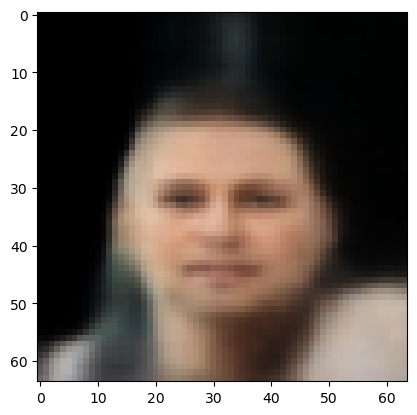

In [63]:
plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())

In [79]:
img = th.zeros(1, 3, 64, 64).to(device)
img[0, :, :32, :] = 0
img[0, :, 32:, :] = 1

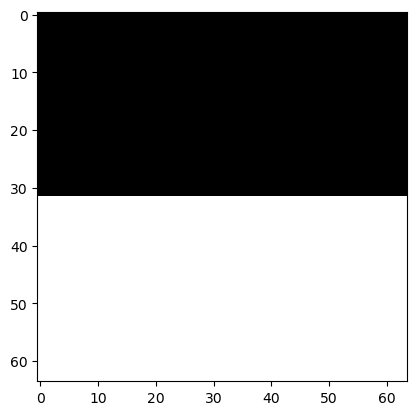

In [80]:
plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())

In [110]:
th.nn.functional.conv2d(img[0].unsqueeze(0), lap_ker.unsqueeze(0)).var()

tensor(0.2904, device='cuda:0')

In [98]:
# Blur
blur_ker = (
    th.tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]]).float().expand(3, 3, 3).to(device)
)
img_blurred = th.nn.functional.conv2d(img, blur_ker.unsqueeze(0))

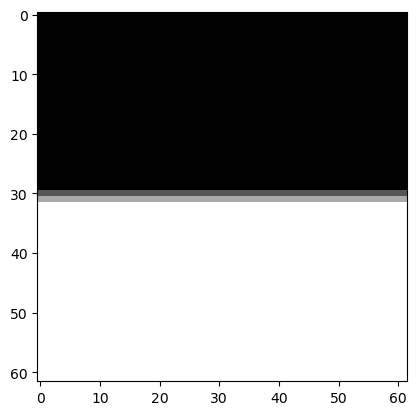

In [99]:
plt.imshow(img_blurred[0].permute(1, 2, 0).cpu().detach().numpy(), cmap="gray")

In [96]:
img_blurred[0].shape

torch.Size([1, 62, 62])

In [ ]:
img[0]

In [112]:
def variance_of_laplacian(img: th.Tensor) -> th.Tensor:
    lap_ker = (
        th.tensor([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        .float()
        .expand(img.shape[-3], 3, 3)
        .to(device)
    )
    return th.nn.functional.conv2d(img, lap_ker.unsqueeze(0)).var()

In [113]:
variance_of_laplacian(img[0].unsqueeze(0))

tensor(0.2904, device='cuda:0')

In [106]:
img[0].unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [122]:
variance_of_laplacian(img_blurred.expand(1, 3, 62, 62))

tensor(24.3067, device='cuda:0')

In [121]:
img_blurred.expand(1, 3, 62, 62).shape

torch.Size([1, 3, 62, 62])